### Exploratory Data Analysis (EDA)

In [13]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
plt.rcParams["figure.figsize"] = (8, 5)

In [14]:
airbnb_path = Path("../data/raw/AB_NYC_2019.csv")
airbnb_df = pd.read_csv(airbnb_path)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Feature Types

**Numerical:**
- price
- minimum_nights
- number_of_reviews
- reviews_per_month
- calculated_host_listings_count
- availability_365
- latitude, longitude

**Categorical:**
- neighbourhood_group
- neighbourhood
- room_type

**Text or id:**
- name
- host_name
- id
- host_id

In [16]:
# checking missing values
missing = airbnb_df.isna().sum().reset_index().rename(columns={"index": "feature", 0: "missing_count"})
missing.sort_values("missing_count", ascending=False)

,feature,missing_count
12,last_review,10052
13,reviews_per_month,10052
3,host_name,21
1,name,16
0,id,0
2,host_id,0
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0


### Price distribution
The price of an airbnb listing is the main target variable of interest in this project.

In [17]:
# most expensive listings
airbnb_df.sort_values("price", ascending=False).head(10)["price"]

9151     10000
17692    10000
29238    10000
40433     9999
12342     9999
6530      9999
30268     8500
4377      8000
29662     7703
42523     7500
Name: price, dtype: int64

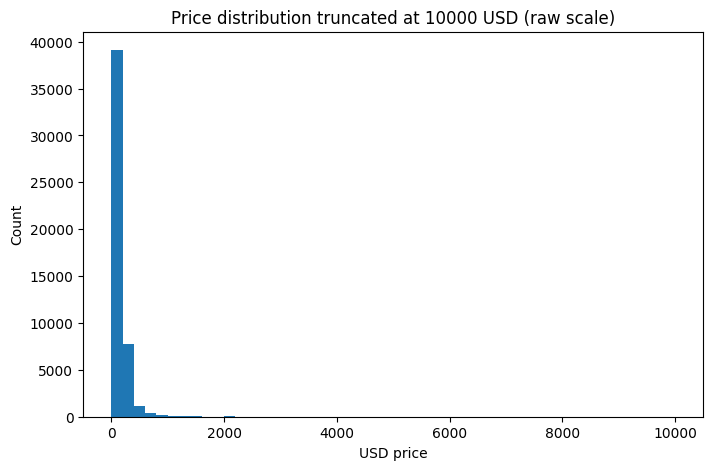

In [18]:
# price histogram – raw scale
plt.hist(airbnb_df["price"], bins=50, range=(0, 10000))
plt.xlabel("USD price")
plt.ylabel("Count")
plt.title("Price distribution truncated at 10000 USD (raw scale)")
plt.savefig("../figures/eda/price_distribution_raw.png", dpi=300, bbox_inches="tight")
plt.show()

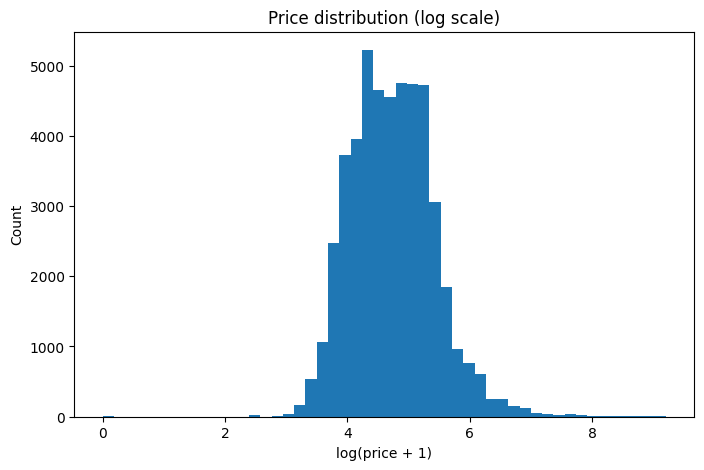

In [19]:
# price histogram – log scale
plt.hist(np.log1p(airbnb_df["price"]), bins=50)
plt.xlabel("log(price + 1)")
plt.ylabel("Count")
plt.title("Price distribution (log scale)")
plt.savefig("../figures/eda/price_distribution_log.png", dpi=300, bbox_inches="tight")
plt.show()

### Price differences across room types

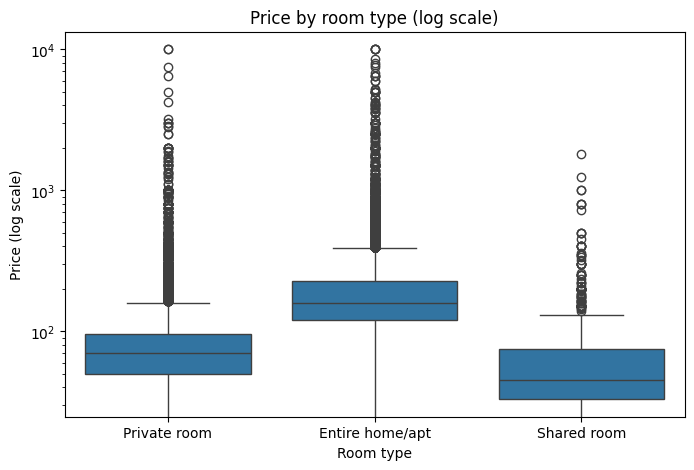

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="room_type", y="price", data=airbnb_df)
plt.yscale("log")
plt.xlabel("Room type")
plt.ylabel("Price (log scale)")
plt.title("Price by room type (log scale)")
plt.savefig("../figures/eda/price_by_room_type.png", dpi=300, bbox_inches="tight")
plt.show()

### Price vs neighbourhood group

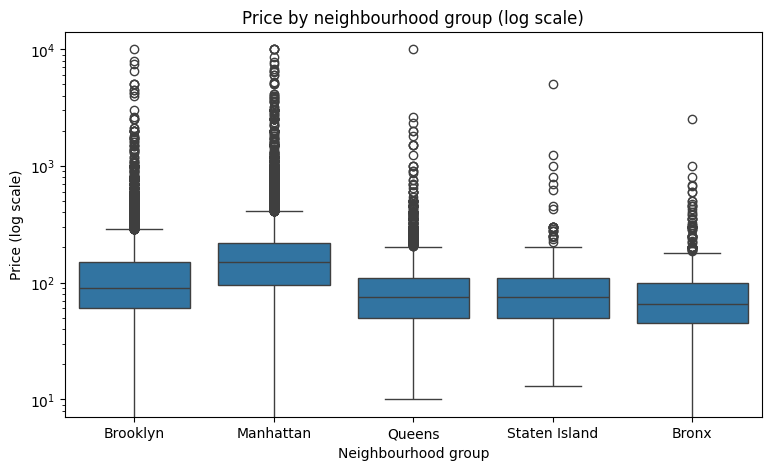

In [21]:
plt.figure(figsize=(9, 5))
sns.boxplot(x="neighbourhood_group", y="price", data=airbnb_df)
plt.yscale("log")
plt.xlabel("Neighbourhood group")
plt.ylabel("Price (log scale)")
plt.title("Price by neighbourhood group (log scale)")
plt.savefig("../figures/eda/price_by_neighbourhood_group.png", dpi=300, bbox_inches="tight")
plt.show()

### Relationship between price and availability

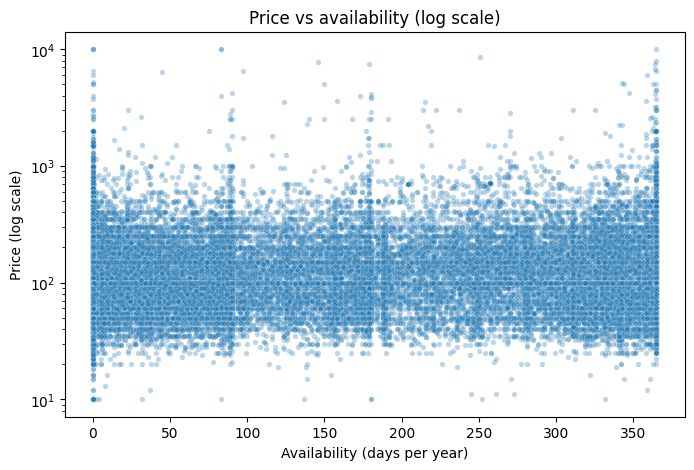

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="availability_365",
    y="price",
    data=airbnb_df,
    alpha=0.3,
    s=15
)
plt.yscale("log")
plt.xlabel("Availability (days per year)")
plt.ylabel("Price (log scale)")
plt.title("Price vs availability (log scale)")
plt.savefig("../figures/eda/price_vs_availability.png", dpi=300, bbox_inches="tight")
plt.show()

### Correlation matrix for numerical features

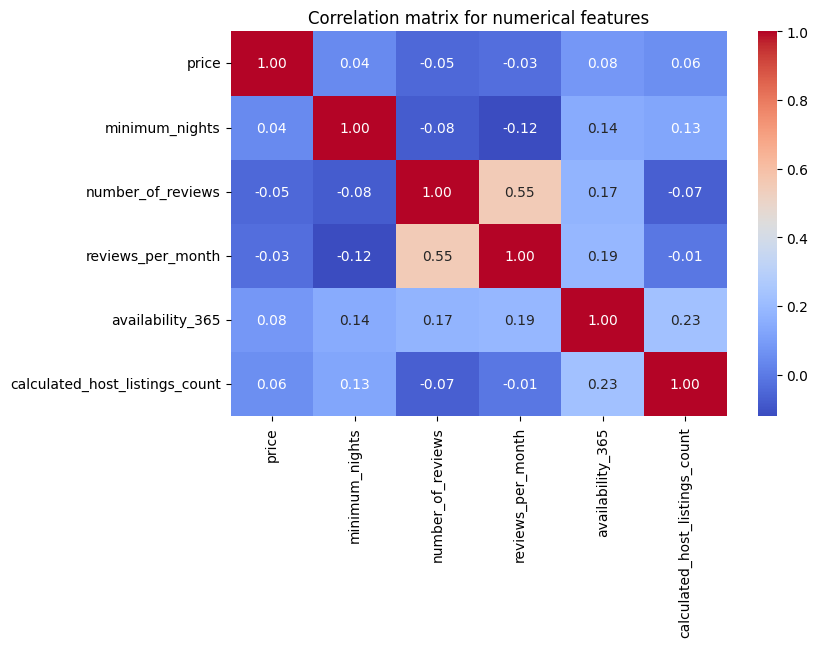

In [23]:
num_cols = [
    "price", "minimum_nights", "number_of_reviews",
    "reviews_per_month", "availability_365",
    "calculated_host_listings_count"
]

corr = airbnb_df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix for numerical features")
plt.savefig("../figures/eda/correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

### Spatial distribution of Airbnb prices in NYC. Based on log price for better visualization.

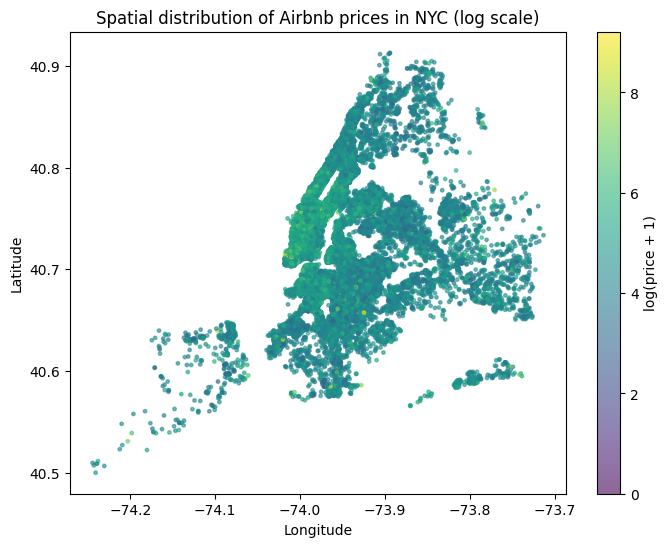

In [24]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    airbnb_df["longitude"],
    airbnb_df["latitude"],
    c=np.log1p(airbnb_df["price"]),
    cmap="viridis",
    s=6,
    alpha=0.6
)
plt.colorbar(sc, label="log(price + 1)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial distribution of Airbnb prices in NYC (log scale)")
plt.savefig("../figures/eda/spatial_price_distribution.png", dpi=300, bbox_inches="tight")
plt.show()